<div style="color: #000; background-color: #EEE; border-radius: 8px; font-size: 150%; letter-spacing: 1.0px; padding: 8px;">
 <p style="margin: 0; color: #000;"><b><span style='color: #000;'>5G Resource Allocation📡: Optimizing Band🚀</span></b></p>
  
</div>

<center>
    <img src="https://www.researchgate.net/publication/350775772/figure/fig3/AS:1010914123857920@1618032117014/EE-resource-allocation-in-5G-network-architecture.png" alt="Custumor churn prediction" width="50%">
</center>




**Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

**Load and Preprocess Data**

In [2]:
df=pd.read_csv('/kaggle/input/5g-quality-of-service/Quality of Service 5G.csv')

In [3]:
df.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [5]:
df.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

In [6]:
df.describe(include='object')

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,400,400,400,400,400,400,400,400
unique,7,400,11,84,87,188,194,9
top,9/3/2023 10:01,User_1,Video_Call,-97 dBm,5 ms,0.1 Mbps,0.1 Mbps,70%
freq,60,1,58,9,35,16,16,148


In [7]:

df.duplicated().sum()

0

In [8]:
df['Application_Type']

0             Video_Call
1             Voice_Call
2              Streaming
3      Emergency_Service
4          Online_Gaming
             ...        
395            Streaming
396           Video_Call
397      Video_Streaming
398    Emergency_Service
399         Web_Browsing
Name: Application_Type, Length: 400, dtype: object

In [9]:

# Get unique values in 'Application_Type' column
unique_values = df['Application_Type'].unique().tolist()
print("Unique values:", unique_values)


Unique values: ['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service', 'Online_Gaming', 'Background_Download', 'Web_Browsing', 'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call']


In [10]:
# Create a mapping dictionary
encoding_dict = {value: idx for idx, value in enumerate(unique_values)}

# Apply the mapping to the 'Application_Type' column
df['Application_Type'] = df['Application_Type'].map(encoding_dict)

print("Encoding Dictionary:", encoding_dict)
df


Encoding Dictionary: {'Video_Call': 0, 'Voice_Call': 1, 'Streaming': 2, 'Emergency_Service': 3, 'Online_Gaming': 4, 'Background_Download': 5, 'Web_Browsing': 6, 'IoT_Temperature': 7, 'Video_Streaming': 8, 'File_Download': 9, 'VoIP_Call': 10}


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,0,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,1,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,2,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,3,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,4,-78 dBm,25 ms,2 Mbps,3 Mbps,85%
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,User_396,2,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,0,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,8,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,3,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%


In [11]:
# Remove unwanted substr and convert to int dtype

df['Resource_Allocation'] = df['Resource_Allocation'].str.replace('%','').astype('int')

df['User_ID'] = df['User_ID'].str.replace('User_','').astype('int')

In [12]:
df

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,1,0,-75 dBm,30 ms,10 Mbps,15 Mbps,70
1,9/3/2023 10:00,2,1,-80 dBm,20 ms,100 Kbps,120 Kbps,80
2,9/3/2023 10:00,3,2,-85 dBm,40 ms,5 Mbps,6 Mbps,75
3,9/3/2023 10:00,4,3,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90
4,9/3/2023 10:00,5,4,-78 dBm,25 ms,2 Mbps,3 Mbps,85
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,396,2,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85
396,9/3/2023 10:06,397,0,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75
397,9/3/2023 10:06,398,8,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70
398,9/3/2023 10:06,399,3,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70


In [13]:
#convert the Required Bandwisth to Kbps

def mbps_to_kbps(value):  
    if 'Mbps' in value:
        n = float(value.replace(' Mbps',''))
        return str(n*1000)+' Kbps'
    else:
        return value
    
    
df['Required_Bandwidth'] = df['Required_Bandwidth'].map(mbps_to_kbps)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].map(mbps_to_kbps)

In [14]:
df

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,1,0,-75 dBm,30 ms,10000.0 Kbps,15000.0 Kbps,70
1,9/3/2023 10:00,2,1,-80 dBm,20 ms,100 Kbps,120 Kbps,80
2,9/3/2023 10:00,3,2,-85 dBm,40 ms,5000.0 Kbps,6000.0 Kbps,75
3,9/3/2023 10:00,4,3,-70 dBm,10 ms,1000.0 Kbps,1500.0 Kbps,90
4,9/3/2023 10:00,5,4,-78 dBm,25 ms,2000.0 Kbps,3000.0 Kbps,85
...,...,...,...,...,...,...,...,...
395,9/3/2023 10:06,396,2,-110 dBm,61 ms,1300.0 Kbps,1800.0 Kbps,85
396,9/3/2023 10:06,397,0,-40 dBm,53 ms,14500.0 Kbps,15800.0 Kbps,75
397,9/3/2023 10:06,398,8,-113 dBm,58 ms,1000.0 Kbps,1400.0 Kbps,70
398,9/3/2023 10:06,399,3,-40 dBm,5 ms,400.0 Kbps,400.0 Kbps,70


In [15]:

df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Kbps','').astype('float')
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Kbps','').astype('float')
df['Latency'] = df['Latency'].str.replace(' ms','').astype('int')
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm','').astype('int')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [16]:
df

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,1,0,-75,30,10000.0,15000.0,70
1,2023-09-03 10:00:00,2,1,-80,20,100.0,120.0,80
2,2023-09-03 10:00:00,3,2,-85,40,5000.0,6000.0,75
3,2023-09-03 10:00:00,4,3,-70,10,1000.0,1500.0,90
4,2023-09-03 10:00:00,5,4,-78,25,2000.0,3000.0,85
...,...,...,...,...,...,...,...,...
395,2023-09-03 10:06:00,396,2,-110,61,1300.0,1800.0,85
396,2023-09-03 10:06:00,397,0,-40,53,14500.0,15800.0,75
397,2023-09-03 10:06:00,398,8,-113,58,1000.0,1400.0,70
398,2023-09-03 10:06:00,399,3,-40,5,400.0,400.0,70


In [17]:
df.drop('User_ID', axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Timestamp            400 non-null    datetime64[ns]
 1   Application_Type     400 non-null    int64         
 2   Signal_Strength      400 non-null    int64         
 3   Latency              400 non-null    int64         
 4   Required_Bandwidth   400 non-null    float64       
 5   Allocated_Bandwidth  400 non-null    float64       
 6   Resource_Allocation  400 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 22.0 KB


**Data Visualization**

<Axes: xlabel='Allocated_Bandwidth', ylabel='count'>

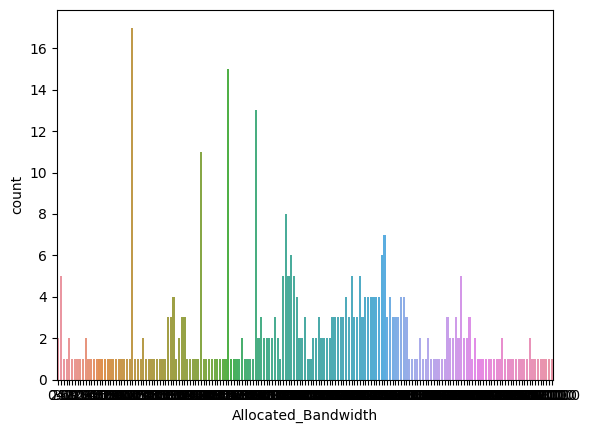

In [19]:
sns.countplot(x=df['Allocated_Bandwidth'])

<Axes: xlabel='Resource_Allocation', ylabel='count'>

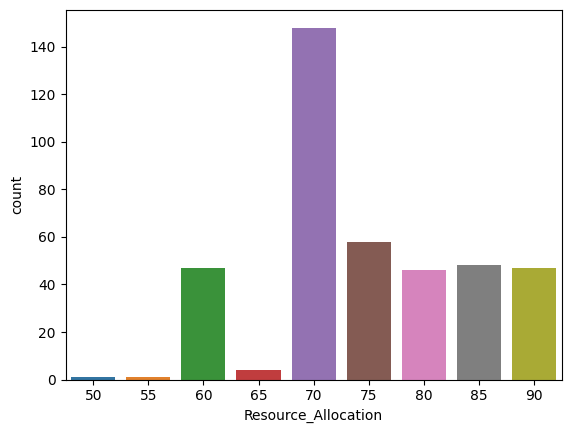

In [20]:
# Find count of values in target variable
sns.countplot(x=df['Resource_Allocation'])

<center>
    <img src="https://discovery.cs.illinois.edu/static/learn/Boxplot-WebG.png" width="50%">
</center>

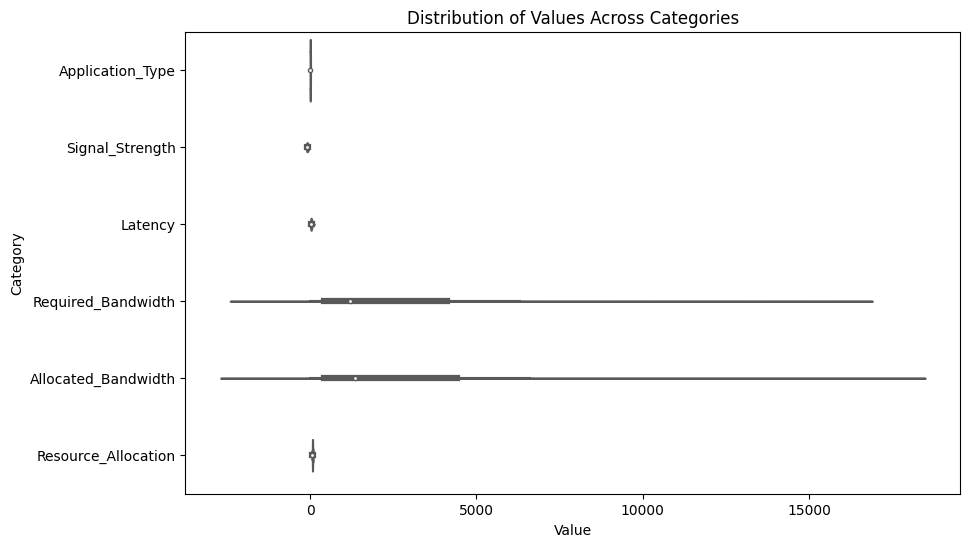

In [21]:


plt.figure(figsize=(10, 6))  

# Create violin plot
sns.violinplot(data=df, orient="h", palette="Set2")

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Category")
plt.title("Distribution of Values Across Categories")

# Display the plot
plt.show()


<Axes: >

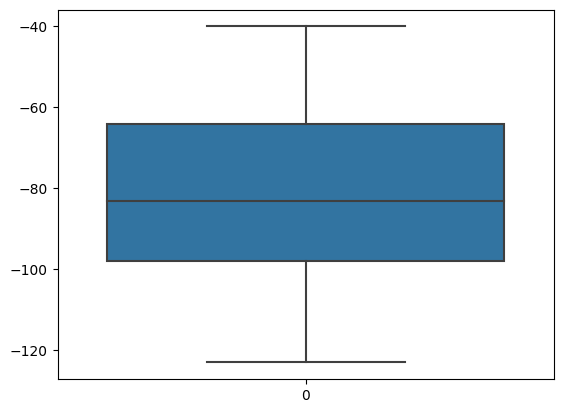

In [22]:
sns.boxplot(data=df['Signal_Strength'])


**--> No outtliers present**

<Axes: >

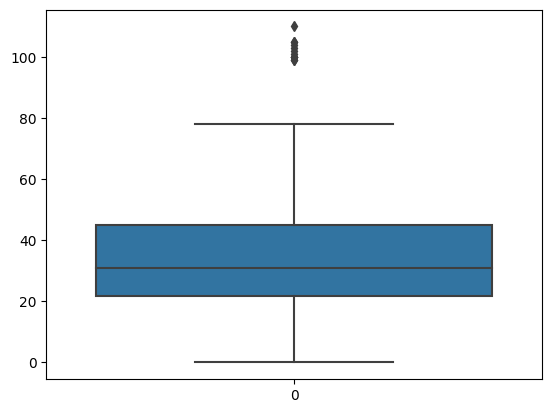

In [23]:
sns.boxplot(data=df['Latency']) 


**-->Outliers present on positive side**

<Axes: >

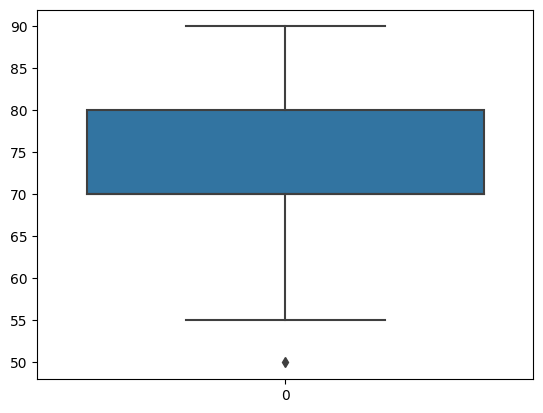

In [24]:
sns.boxplot(data=df['Resource_Allocation'])

**Remove outliers from 'Latency'**

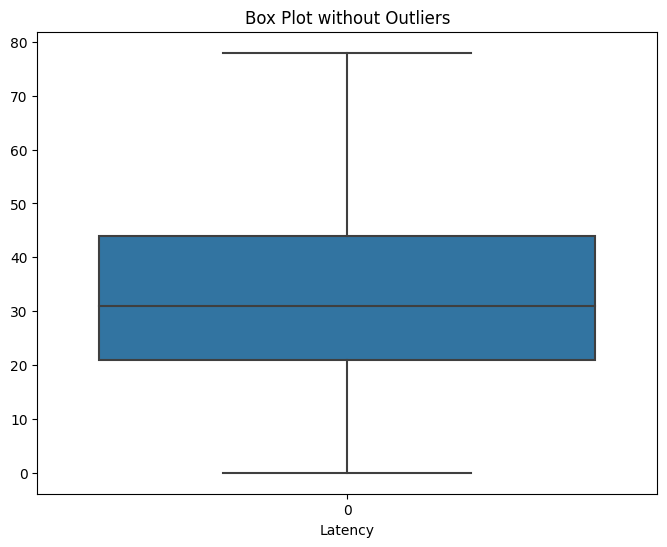

In [25]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Latency'].quantile(0.25)
Q3 = df['Latency'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Latency'] >= lower_bound) & (df['Latency'] <= upper_bound)]

# Plot the data without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered['Latency'])
plt.title('Box Plot without Outliers')
plt.xlabel('Latency')
plt.show()

<Axes: >

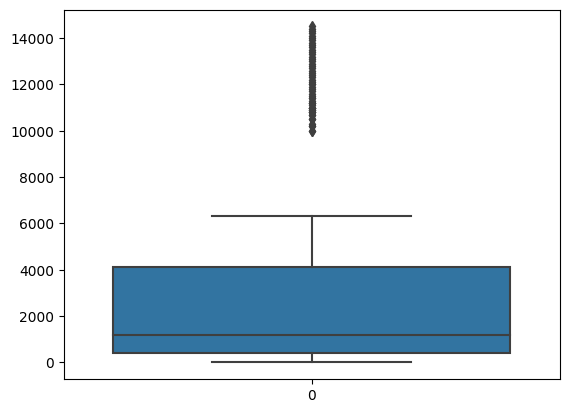

In [26]:
sns.boxplot(data=df['Required_Bandwidth']) 

**--->Outliers present on positive side**

<Axes: >

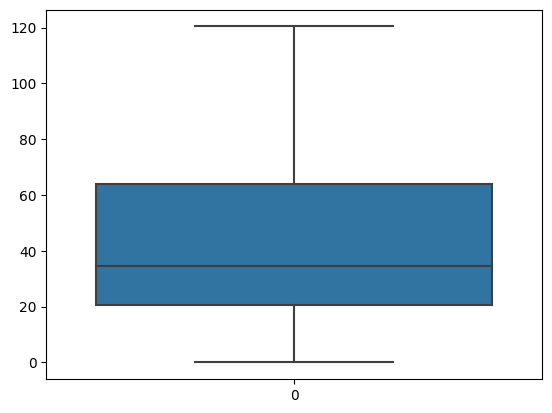

In [27]:
#Remove outliers using sqrt transformation
df['Required_Bandwidth'] = np.sqrt(df['Required_Bandwidth'])

sns.boxplot(data=df['Required_Bandwidth'])

<Axes: >

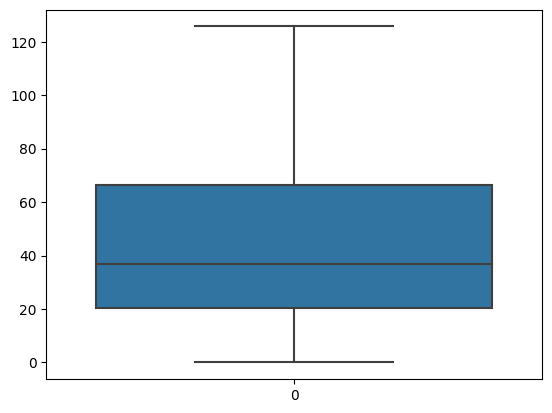

In [28]:
df['Allocated_Bandwidth'] = np.sqrt(df['Allocated_Bandwidth'])

sns.boxplot(data=df['Allocated_Bandwidth']) 

In [29]:
# Function to remove outliers based on IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Remove outliers from the DataFrame
df_filtered = remove_outliers(df)

<Axes: >

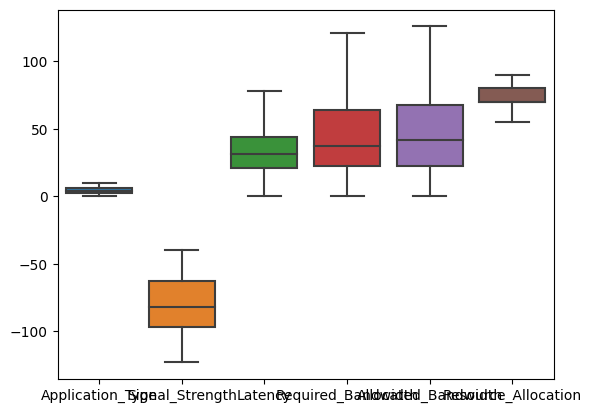

In [30]:
sns.boxplot(data=df_filtered) 

**--->Outliers removed from all the columns,but we have to normalize data in one range**

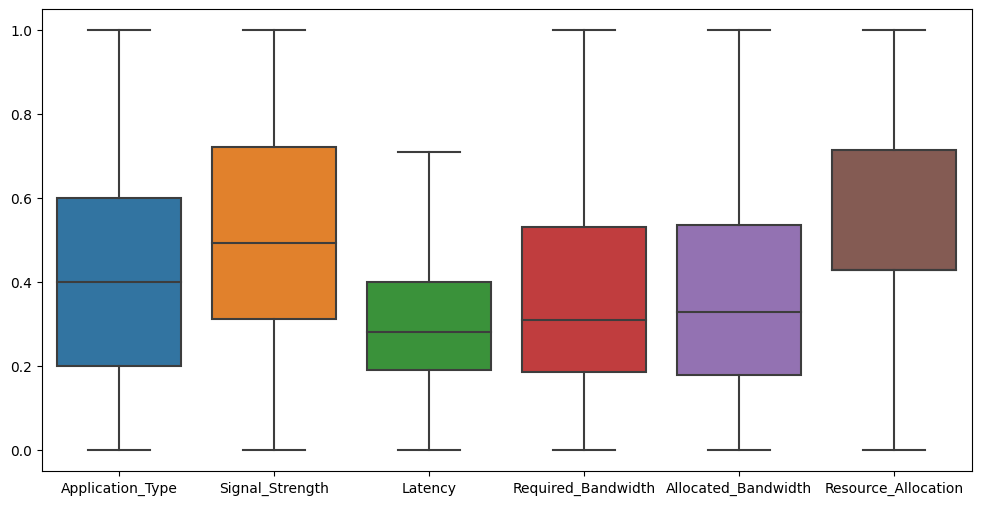

In [31]:
# Define the min-max scaling function
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

Transformed_df = df_filtered

Transformed_df['Signal_Strength'] = min_max_scaling(df_filtered['Signal_Strength'])
Transformed_df['Latency'] = min_max_scaling(df['Latency'])
Transformed_df['Required_Bandwidth'] = min_max_scaling(df_filtered['Required_Bandwidth'])
Transformed_df['Allocated_Bandwidth'] = min_max_scaling(df_filtered['Allocated_Bandwidth'])
Transformed_df['Resource_Allocation'] = min_max_scaling(df_filtered['Resource_Allocation'])
Transformed_df['Application_Type'] = min_max_scaling(df_filtered['Application_Type'])

Transformed_df.drop('Timestamp', axis=1, inplace=True)

plt.figure(figsize=(12,6))
sns.boxplot(data=Transformed_df)
plt.show()


In [32]:
# Display the DataFrame without outliers
print("Original DataFrame:")
df


Original DataFrame:


,Timestamp,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,2023-09-03 10:00:00,0,-75,30,100.000000,122.474487,70
1,2023-09-03 10:00:00,1,-80,20,10.000000,10.954451,80
2,2023-09-03 10:00:00,2,-85,40,70.710678,77.459667,75
3,2023-09-03 10:00:00,3,-70,10,31.622777,38.729833,90
4,2023-09-03 10:00:00,4,-78,25,44.721360,54.772256,85
...,...,...,...,...,...,...,...
395,2023-09-03 10:06:00,2,-110,61,36.055513,42.426407,85
396,2023-09-03 10:06:00,0,-40,53,120.415946,125.698051,75
397,2023-09-03 10:06:00,8,-113,58,31.622777,37.416574,70
398,2023-09-03 10:06:00,3,-40,5,20.000000,20.000000,70


In [33]:
print("\nDataFrame after removing outliers:")
Transformed_df


DataFrame after removing outliers:


,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,0.0,0.578313,0.272727,0.830455,0.974355,0.428571
1,0.1,0.518072,0.181818,0.083045,0.087149,0.714286
2,0.2,0.457831,0.363636,0.587220,0.616236,0.571429
3,0.3,0.638554,0.090909,0.262613,0.308118,1.000000
4,0.4,0.542169,0.227273,0.371391,0.435745,0.857143
...,...,...,...,...,...,...
395,0.2,0.156627,0.554545,0.299425,0.337526,0.857143
396,0.0,1.000000,0.481818,1.000000,1.000000,0.571429
397,0.8,0.120482,0.527273,0.262613,0.297670,0.428571
398,0.3,1.000000,0.045455,0.166091,0.159111,0.428571


In [34]:
Transformed_df.describe()

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.460982,0.520096,0.286634,0.386077,0.390511,0.567368
std,0.309608,0.249585,0.157021,0.273194,0.277136,0.257148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.313253,0.190909,0.185695,0.177892,0.428571
50%,0.400000,0.493976,0.281818,0.310728,0.328017,0.428571
75%,0.600000,0.722892,0.400000,0.531751,0.536625,0.714286
max,1.000000,1.000000,0.709091,1.000000,1.000000,1.000000


**Split the data**

In [35]:
X = Transformed_df.drop('Resource_Allocation', axis=1)
Y = Transformed_df['Resource_Allocation']

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((309, 5), (78, 5), (309,), (78,))

**Linear Regression**

> **Create and Train the Model :**

In [38]:
lin_regressor = LinearRegression()
lin_regressor.fit(x_train,y_train)

LinearRegression()

> **Predict Test Set Results :**

In [39]:
lin_regressor_y_pred = lin_regressor.predict(x_test)

> **Evaluation of Model Performance :**

**R² (Coefficient of Determination)**: Indicates how well the model's predictions match the actual data, representing the proportion of variance explained by the model. Higher values suggest a better fit.

**RMSE (Root Mean Squared Error)**: Measures the average error in predictions, expressed in the same units as the data. Lower values indicate more accurate predictions.

**MSE (Mean Squared Error)**: Calculates the average of squared differences between predicted and actual values, emphasizing larger errors. It helps assess the model's quality.

In [40]:
lin_regressor_r2 = r2_score(y_test, lin_regressor_y_pred)
lin_regressor_r2

0.40296536675296446

In [41]:
lin_regressor_mse = mean_squared_error(y_test, lin_regressor_y_pred)
lin_regressor_mse

0.03623471272705462

In [42]:
lin_regressor_rmse = np.sqrt(lin_regressor_mse)
lin_regressor_rmse

0.1903541770675249

> **Visualize the Results of the Prediction :**

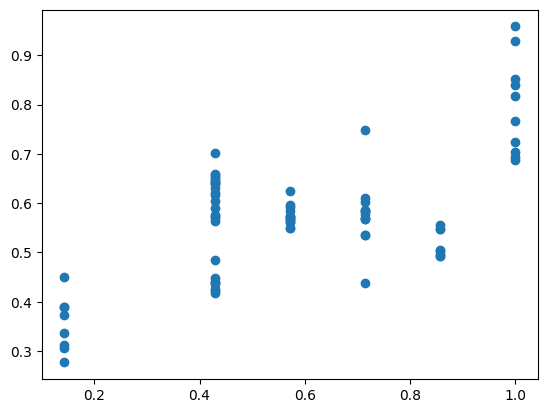

In [43]:
plt.scatter(y_test, lin_regressor_y_pred)
plt.show()

 > **Scatter Plots of each feature vs predicted value with regression line**

<center>
    <img src="https://arize.com/wp-content/uploads/2023/08/rmse-example-regression.jpg" alt="Custumor churn prediction" width="50%">
</center>

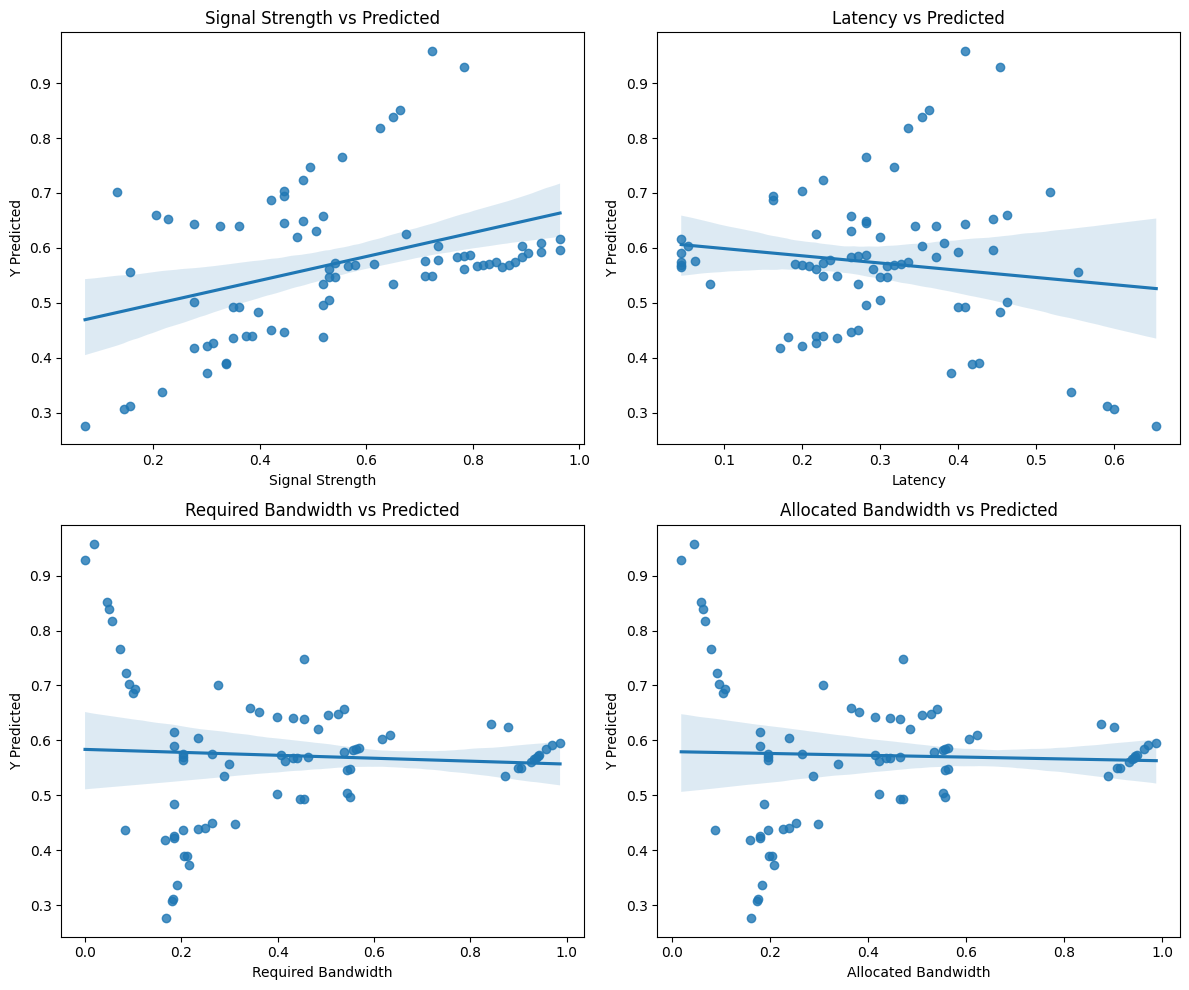

In [44]:

lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = lin_regressor_y_pred

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot, ax=axes[0, 0])
axes[0, 0].set_title('Signal Strength vs Predicted')
axes[0, 0].set_xlabel('Signal Strength')
axes[0, 0].set_ylabel('Y Predicted')

sns.regplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot, ax=axes[0, 1])
axes[0, 1].set_title('Latency vs Predicted')
axes[0, 1].set_xlabel('Latency')
axes[0, 1].set_ylabel('Y Predicted')

sns.regplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot, ax=axes[1, 0])
axes[1, 0].set_title('Required Bandwidth vs Predicted')
axes[1, 0].set_xlabel('Required Bandwidth')
axes[1, 0].set_ylabel('Y Predicted')

sns.regplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot, ax=axes[1, 1])
axes[1, 1].set_title('Allocated Bandwidth vs Predicted')
axes[1, 1].set_xlabel('Allocated Bandwidth')
axes[1, 1].set_ylabel('Y Predicted')

plt.tight_layout()
plt.show()


**SVM model regression**

> **Create and Train the Model :**

In [45]:
svr = SVR(kernel='poly')
svr.fit(x_train, y_train)

SVR(kernel='poly')

In [46]:
x_test

,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Y_Predicted
60,0.0,0.506024,0.263636,0.842820,0.875113,0.630673
137,0.6,0.349398,0.245455,0.203419,0.194871,0.436235
325,0.8,0.228916,0.445455,0.361987,0.381536,0.652582
188,0.0,0.722892,0.245455,0.905919,0.914026,0.549160
294,0.3,0.903614,0.045455,0.185695,0.177892,0.589924
...,...,...,...,...,...,...
100,1.0,0.445783,0.163636,0.103391,0.106735,0.694383
389,0.8,0.132530,0.518182,0.275431,0.308118,0.701421
117,0.5,0.301205,0.390909,0.216556,0.207456,0.373274
259,0.2,0.361446,0.400000,0.454859,0.470658,0.492690


In [47]:
x_test.drop('Y_Predicted', axis=1, inplace=True)

> **Predict Test Set Results :**

In [48]:
svr_y_pred = svr.predict(x_test)
svr_y_pred

array([0.44699266, 0.37174029, 0.38295402, 0.51690985, 0.43281443,
       0.95312581, 0.76149751, 0.40331708, 0.69386222, 0.43991395,
       0.77231281, 0.62032738, 0.55151414, 0.95896645, 0.80421628,
       0.78370435, 0.7853015 , 0.49195001, 0.80753739, 0.20339817,
       0.75456863, 0.6638649 , 0.64035587, 0.48267981, 0.08549676,
       0.49598876, 0.45123072, 0.4050233 , 0.78538669, 0.57437344,
       0.96056778, 1.00965424, 0.97913257, 0.10920829, 0.35932874,
       0.39508057, 0.63467698, 0.79967765, 0.5929038 , 0.39364988,
       0.91611017, 0.51936059, 0.7578578 , 0.63067049, 0.45469738,
       0.44539718, 0.39119031, 0.92204237, 0.08241717, 0.42628705,
       0.61540915, 0.53174587, 0.44572782, 0.60864021, 0.1078172 ,
       0.39562823, 0.52552436, 0.4850615 , 0.08096405, 0.81067957,
       0.18317643, 0.4426344 , 0.80031821, 0.37256472, 0.38974383,
       0.39708881, 0.60113156, 0.95743784, 0.51167457, 0.76859249,
       0.93670656, 0.66342987, 0.65208505, 0.93233551, 0.33596

> **Evaluation of Model Performance :**

In [49]:
svr_r2 = r2_score(y_test, svr_y_pred)
svr_r2

0.8515129341145349

In [50]:
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mse

0.009011849357517608

In [51]:
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.09493076086031128

> **Visualize the Results of the Prediction :**

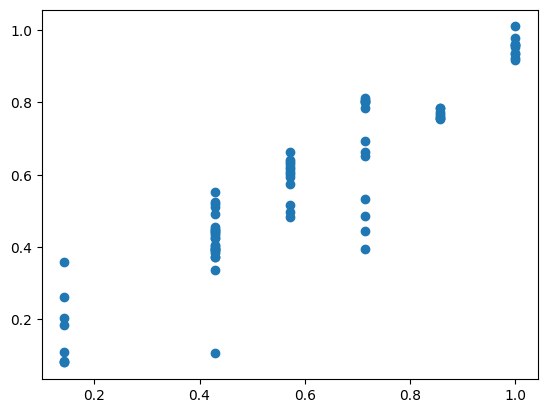

In [52]:
# Plot Actual vs Predicted Values

plt.scatter(y_test, svr_y_pred)
plt.show()

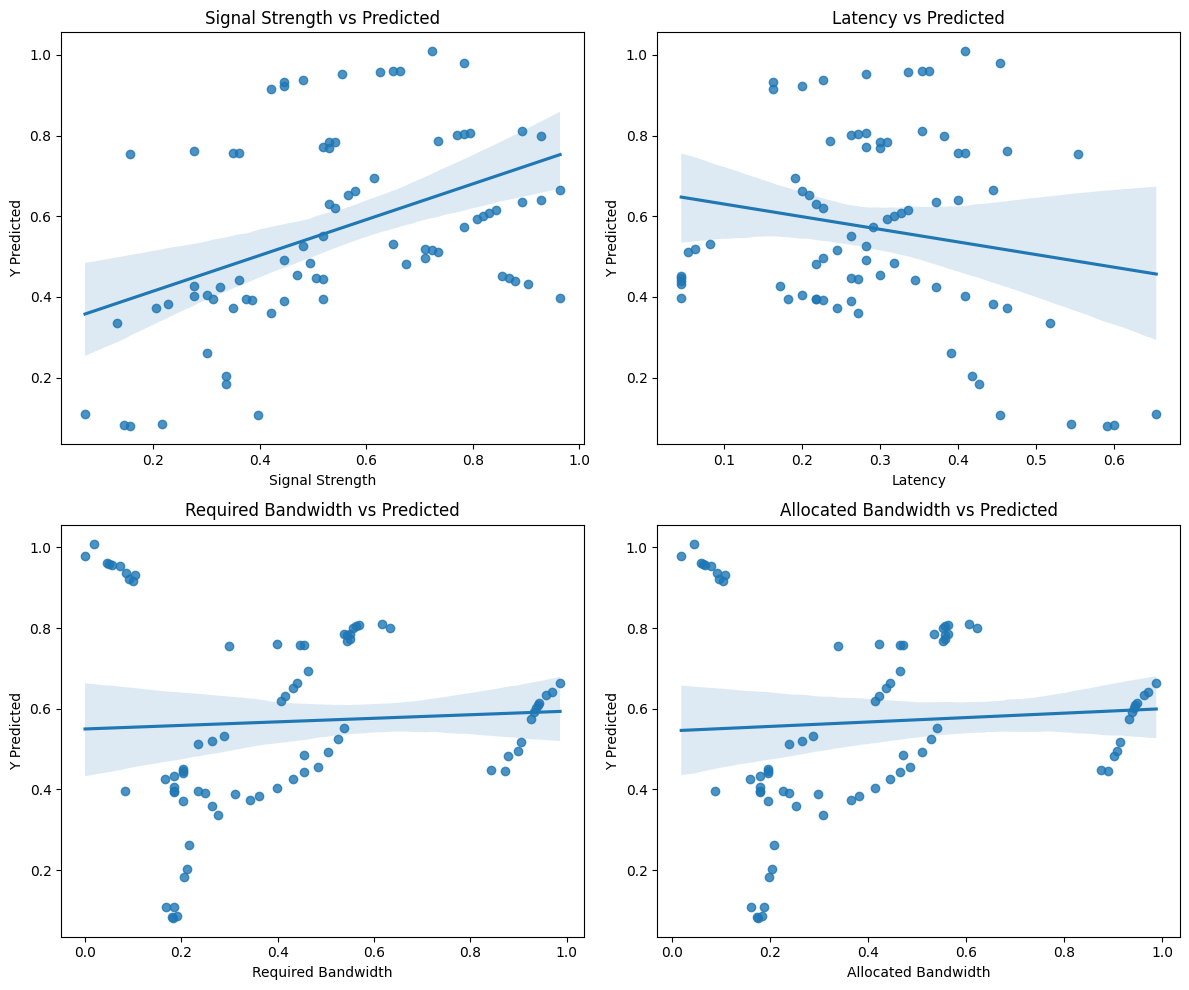

In [53]:

lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = svr_y_pred

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot, ax=axes[0, 0])
axes[0, 0].set_title('Signal Strength vs Predicted')
axes[0, 0].set_xlabel('Signal Strength')
axes[0, 0].set_ylabel('Y Predicted')

sns.regplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot, ax=axes[0, 1])
axes[0, 1].set_title('Latency vs Predicted')
axes[0, 1].set_xlabel('Latency')
axes[0, 1].set_ylabel('Y Predicted')

sns.regplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot, ax=axes[1, 0])
axes[1, 0].set_title('Required Bandwidth vs Predicted')
axes[1, 0].set_xlabel('Required Bandwidth')
axes[1, 0].set_ylabel('Y Predicted')

sns.regplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot, ax=axes[1, 1])
axes[1, 1].set_title('Allocated Bandwidth vs Predicted')
axes[1, 1].set_xlabel('Allocated Bandwidth')
axes[1, 1].set_ylabel('Y Predicted')

plt.tight_layout()
plt.show()

**KNN Regression model**

In [55]:
Knn_reg= KNeighborsRegressor(n_neighbors=5)
Knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

> **Predict Test Set Results :**

In [56]:
x_test.drop('Y_Predicted', axis=1, inplace=True)

In [57]:
knn_y_pred = svr.predict(x_test)

> **Evaluation of Model Performance :**

In [58]:
knn_r2 = r2_score(y_test, knn_y_pred)
knn_r2

0.8515129341145349

In [59]:
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mse

0.009011849357517608

In [60]:
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.09493076086031128

> **Visualize the Results of the Prediction :**

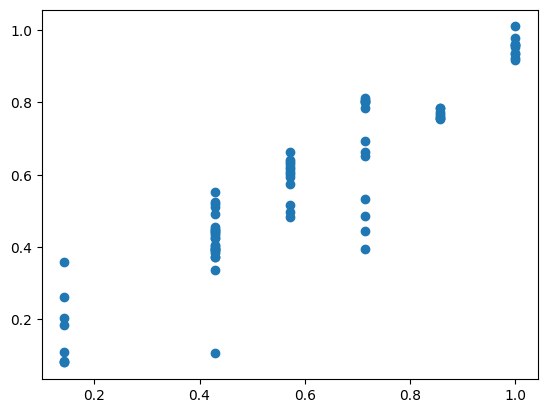

In [61]:
# Plot Actual vs Predicted Values

plt.scatter(y_test, knn_y_pred)
plt.show()

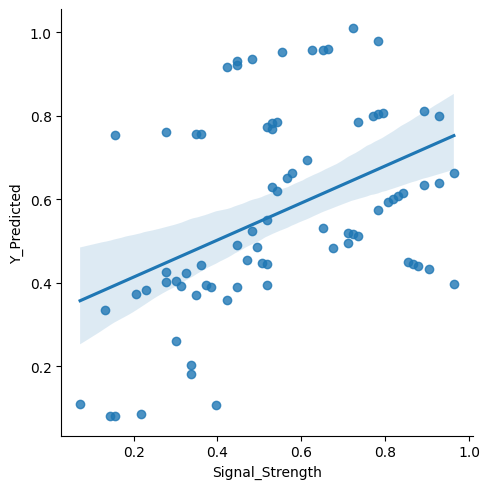

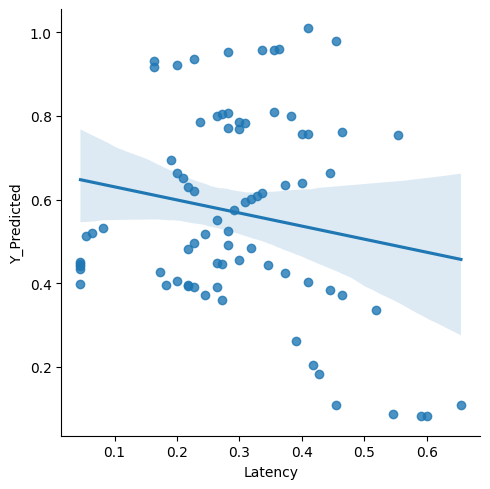

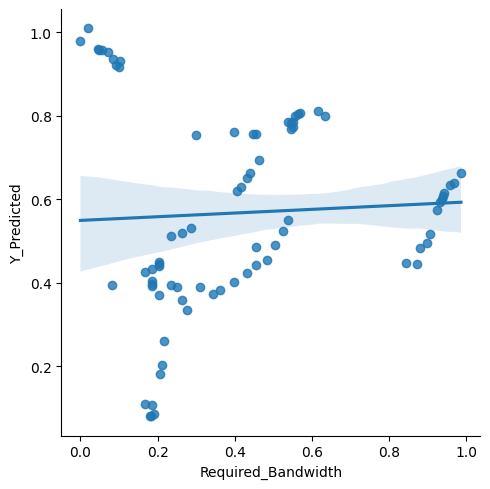

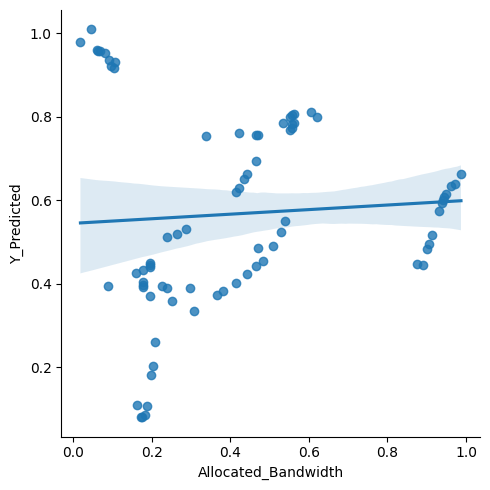

In [62]:
# Scatter Plots of each feature vs predicted value with regression line

lin_regressor_plot = x_test
lin_regressor_plot['Y_Predicted'] = knn_y_pred

sns.lmplot(x='Signal_Strength', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Latency', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Required_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

sns.lmplot(x='Allocated_Bandwidth', y='Y_Predicted', data=lin_regressor_plot)

plt.tight_layout()
plt.show()

**Comparing Results of MLR, SVM and KNN Regression Models**

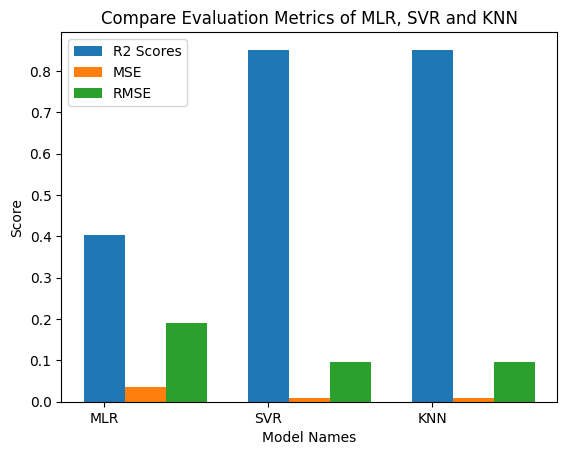

In [63]:
# Create the plot with multiple lines to compare measures like: mse, rmse and r2_score

categories = ['MLR', 'SVR', 'KNN']
x = np.arange(len(categories))
r2_scores = [lin_regressor_r2, svr_r2, knn_r2]
mse_scores = [lin_regressor_mse, svr_mse, knn_mse]
rmse_scores = [lin_regressor_rmse, svr_rmse, knn_rmse]

width = 0.25
fig, ax = plt.subplots()

ax.bar(x, r2_scores, label='R2 Scores', width=0.25)
ax.bar(x+width, mse_scores, label='MSE', width=0.25)
ax.bar(x+2*width, rmse_scores, label='RMSE', width=0.25)

# Customize the plot
plt.xlabel('Model Names')
plt.ylabel('Score')
plt.title('Compare Evaluation Metrics of MLR, SVR and KNN')
plt.legend()  # Show legend with labels
ax.set_xticks(x)
ax.set_xticklabels(categories)

# Show the plot
plt.show()

* **SVR and KNN outperform MLR in terms of R2 score, indicating they are better at explaining the variability in the data.**
* **All three models have low MSE and RMSE, but SVR and KNN have the edge over MLR with slightly lower error values.**
* **Based on the evaluation metrics, SVR and KNN are preferable over MLR for this specific dataset.**